In [51]:
import numpy as np
import matplotlib.pyplot as plt

- numpy, matplotlib을 활용하여 영상데이터의 처리 및 시각화를 진행해보자.
- https://numpy.org/numpy-tutorials/
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html

## Google Drive에서 image 가져오기
- 본인의 PC에서 작업하는 경우 생략 가능

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os

In [54]:
imgpath = '/content/drive/MyDrive/DIP4E'
#os.listdir(imgpath)

In [55]:
myimg0 = plt.imread(os.path.join(imgpath,'angiography-mask-image.tif'))
print(myimg0.shape)
print(myimg0.dtype)

myimg1 = plt.imread(os.path.join(imgpath,'angiography-live-image.tif'))
print(myimg1.shape)
print(myimg1.dtype)

(690, 690)
uint8
(690, 690)
uint8


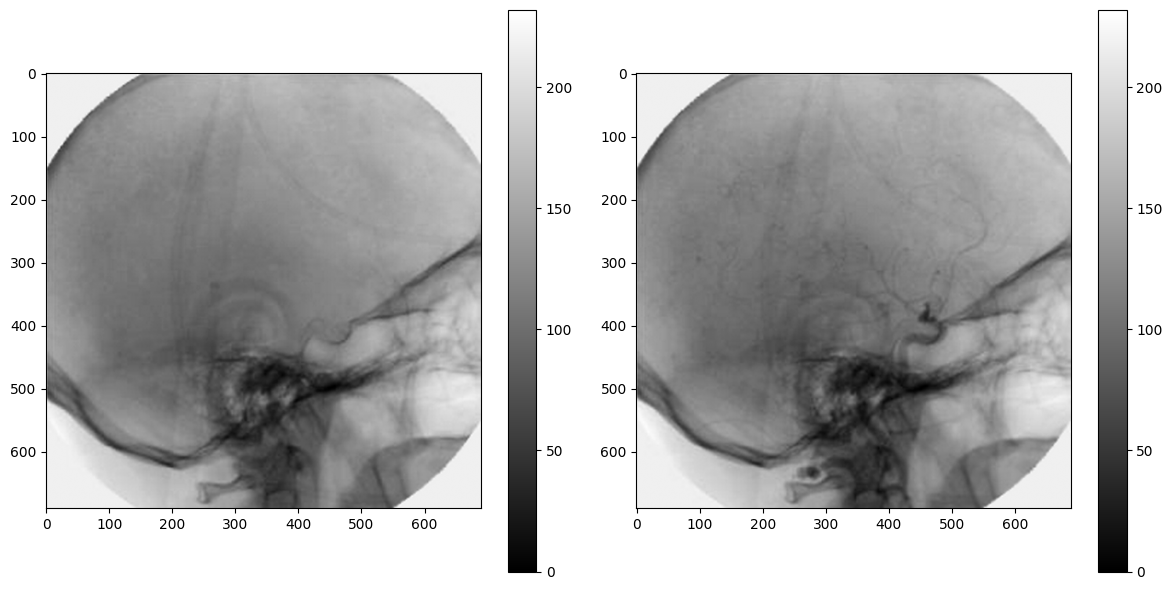

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(myimg0,cmap='gray')
plt.colorbar()
plt.subplot(122)
plt.imshow(myimg1,cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

## 두 영상에 대한 빼기(subtraction) 이미지 생성




## Exercise 1
- 예제의 사칙연산의 결과는 잘못된 부분들이 있다. 잘못된 부분이 무엇인지 이해하고, 이를 해결하여 시각화를 진행해보자.

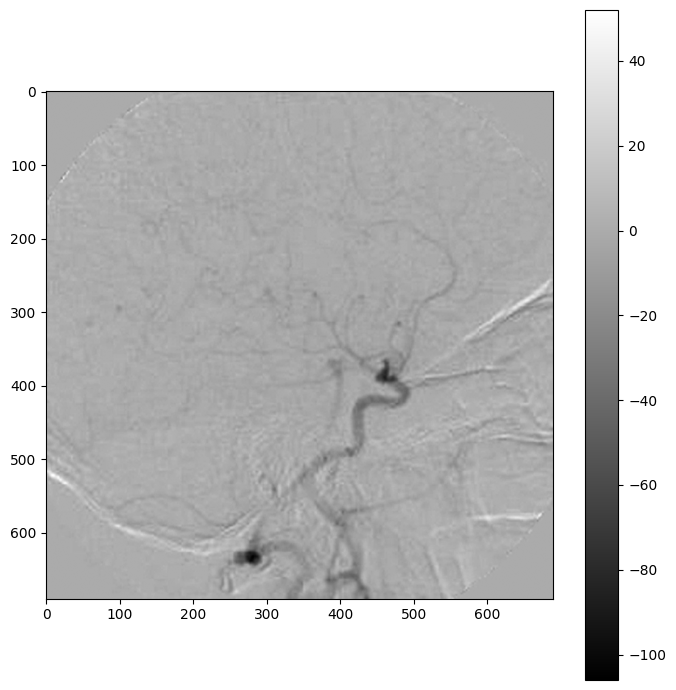

In [57]:
plt.figure(figsize=(7,7))
myimg1=myimg1.astype(np.int16)
myimg0=myimg0.astype(np.int16)
plt.imshow(myimg1-myimg0,cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

## Downsampling & Interpolation

## Exercise 2
- 본인의 사진을 256 x 256 크기로 crop한 후, 32 x 32 크기로 downsampling하여 낮은 해상도의 image로 만들고, 세 가지 다른 interpolation방법으로 영상을 시각화하여 그 결과를 비교하자.

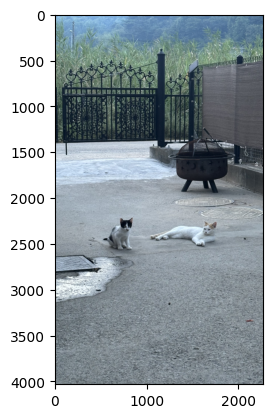

In [58]:
img = plt.imread('IMG_for_HW01.jpg')
plt.imshow(img)
plt.show()

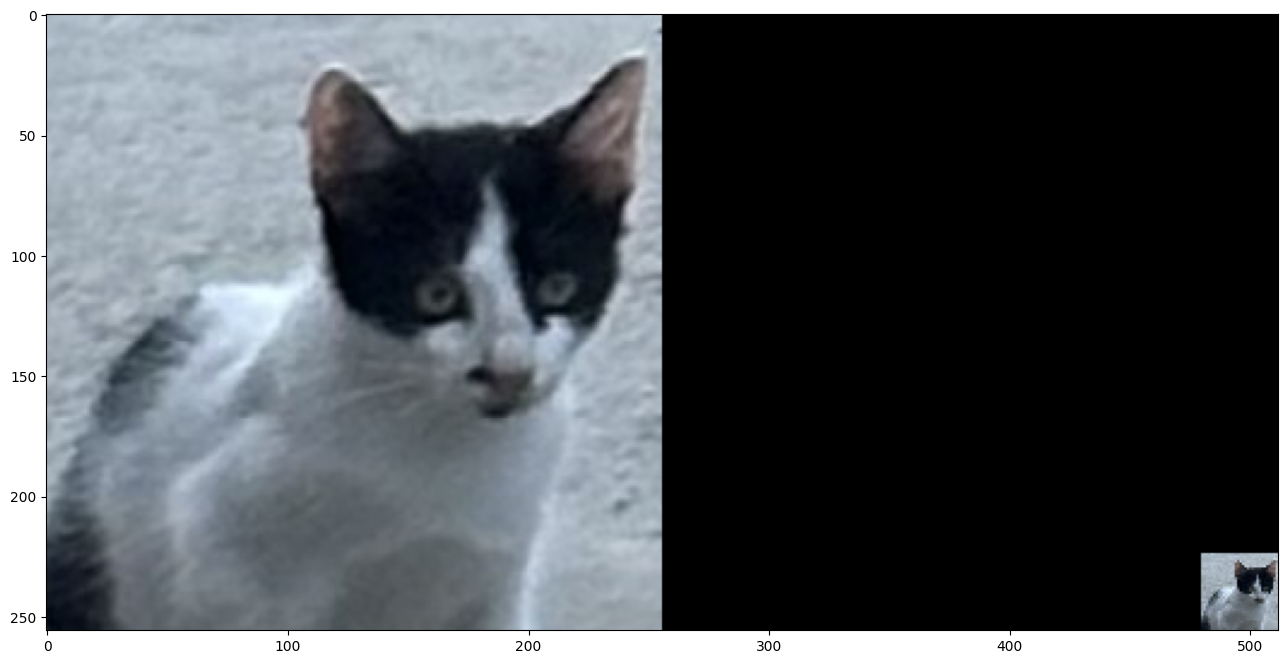

In [59]:
x0=2200
y0=600

img_crop = img[x0:x0+256,y0:y0+256]
img_crop_down = img_crop[::8,::8]

tmp = np.zeros_like(img_crop)
tmp[-32:,-32:,:]=img_crop_down

plt.figure(figsize=(16,8))
plt.imshow(np.concatenate((img_crop,tmp),axis=1))
plt.show()

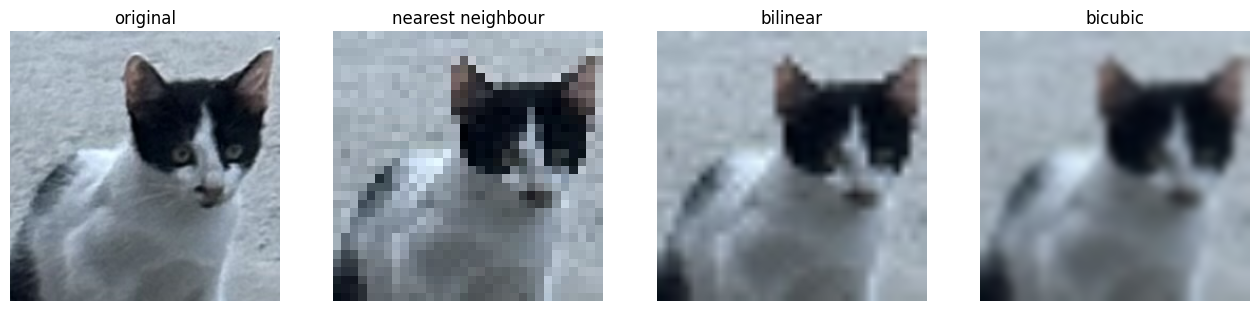

In [60]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(img_crop)
plt.title('original')
plt.axis('off')
plt.subplot(142)
plt.imshow(img_crop_down,interpolation='nearest')
plt.axis('off')
plt.title('nearest neighbour')
plt.subplot(143)
plt.imshow(img_crop_down,interpolation='bilinear')
plt.axis('off')
plt.title('bilinear')
plt.subplot(144)
plt.imshow(img_crop_down,interpolation='bicubic')
plt.axis('off')
plt.title('bicubic')
plt.show()
